In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
full = pd.read_csv('gaia_data_253_csv')
ebminv = pd.read_fwf('HERESsample_EBminV.dat')

arr1=np.array([])
for j in range(377):
    for i in range(249):
        if str(ebminv['name'][j][0:2])+' '+str(ebminv['name'][j][2:11]) in full['Name'][i]:
            arr1=np.append(arr1,j)

arr1=arr1.astype(int)               # array of indices of lines in HERESsample_EBminV.dat which are not needed

In [3]:
delete=np.array([])
for i in range(377):
    if i in arr1:
        pass
    else:
        delete=np.append(delete,i)
        
delete=delete.astype(int)

ebminv249=ebminv.drop(ebminv.index[delete])   # removing lines not needed

ebminv249=ebminv249.reset_index()   # number indices 0...249

# the order should be the same as in gaia_data_253_csv, but I shall check

concat=pd.concat([ebminv249,full],axis=1)   # put it together

# validate that names are correct in a given row

cc=0
for i in range(249):
    if str(concat['name'][i][0:2])+' '+str(concat['name'][i][2:11]) in concat['Name'][i]:
        cc=cc+1
        
print(str(cc)+'/249 names in one row are the same!')

# compare the coordinates

coor1=0
for i in range(249):
    if concat['RAJ2000'][i] in concat['ra2000'][i]:
        coor1=coor1+1
    else:
        print(concat['RAJ2000'][i]+'  '+concat['ra2000'][i])

print('In ra, '+str(coor1)+'/249 are exactly the same. The others are listed above to check manually.')

coor2=0
for i in range(249):
    if concat['DEJ2000'][i] in concat['dec2000'][i]:
        coor2=coor2+1
    else:
        print(concat['DEJ2000'][i]+'  '+concat['dec2000'][i])

print('In dec, '+str(coor2)+'/249 are exactly the same. The others are listed above to check manually.')

249/249 names in one row are the same!
02 17 26.6  02 17 26.5
04 19 45.5  04 19 45.3
04 24 32.8  04 24 32.6
22 17 01.6  22 17 01.4
23 31 13.5  23 31 13.2
23 55 49.0  23 55 48.7
02 15 42.7  02 15 42.3
22 31 02.1  22 31 02.3
22 25 01.1  22 25 01.0
00 28 06.9  00 28 06.6
20 45 54.1  20 45 53.6
23 37 38.8  23 37 38.6
23 34 26.6  23 34 26.5
22 01 21.5  22 01 21.3
00 23 12.9  00 23 12.8
21 45 17.5  21 45 17.4
00 08 07.8  00 08 07.6
00 35 03.0  00 35 02.9
05 08 53.5  05 08 53.3
In ra, 230/249 are exactly the same. The others are listed above to check manually.
-09 00 45  -09 00 44
-36 51 35  -36 51 37
-37 09 02  -37 08 59
-10 23 20  -10 23 21
-16 39 27  -16 39 26
-66 29 57  -66 30 08
-05 22 52  -05 22 54
-32 38 36  -32 38 31
-32 14 41  -32 14 46
-26 03 04  -26 03 03
-24 01 58  -24 02 03
-44 50 29  -44 50 28
-26 21 53  -26 22 04
-26 42 14  -26 42 19
-30 57 57  -30 58 01
-37 01 26  -37 01 28
-37 22 18  -37 22 21
-15 54 03  -15 54 04
-15 54 29  -15 54 36
-59 18 21  -59 18 26
-16 00 45  -16 00 48

In [4]:
# save complete table as csv file

concat.to_csv('gaia_data_253_csv_ebv',sep=',')

In [5]:
h = np.genfromtxt('gaia_data_253_csv_ebv',delimiter=',',skip_header=1)

# parallax 39
# parallax error 40
# bp_rp 93
# phot_g_mean_mag 80
# B_V 6
# E_B_V 7

# find out how many parallaxes are negative, and how many parallaxes and bp_rp values are NaN

x=0
for line in h:
    if line[39] <= 0:
        x=x+1
        
y=0
for line in h:
    if np.isnan(line[39]) == True:
        y=y+1

z=0
for line in h:
    if np.isnan(line[93]) == True:
        z=z+1
        
# note that for some lines, both the parallax and bp_rp are NaN
        
print('Total number of objects in file:',int(np.size(np.transpose(h)[0])))
print('Number of non-positive parallaxes:',x)
print('Number of objects without a measurement for the parallax:',y)
print('Number of objects without a measurement for bp_rp:',z)
        
# remove non-positive parallaxes and lines where bp_rp or parallax is NaN by creating array
# containing the indices of the lines where that is the case:

a=np.array([])
for i in np.arange(int(np.size(np.transpose(h)[0]))):
    if (h[int(i)][39] <= 0) or (np.isnan(h[int(i)][39]) == True) or (np.isnan(h[int(i)][93]) == True):
        a=np.append(a,i)

a = a.astype(int)        # np.delete wants integers
        
h = np.transpose(np.delete(h,a,0))   # transpose since columns and rows are mixed up

Total number of objects in file: 249
Number of non-positive parallaxes: 9
Number of objects without a measurement for the parallax: 1
Number of objects without a measurement for bp_rp: 0


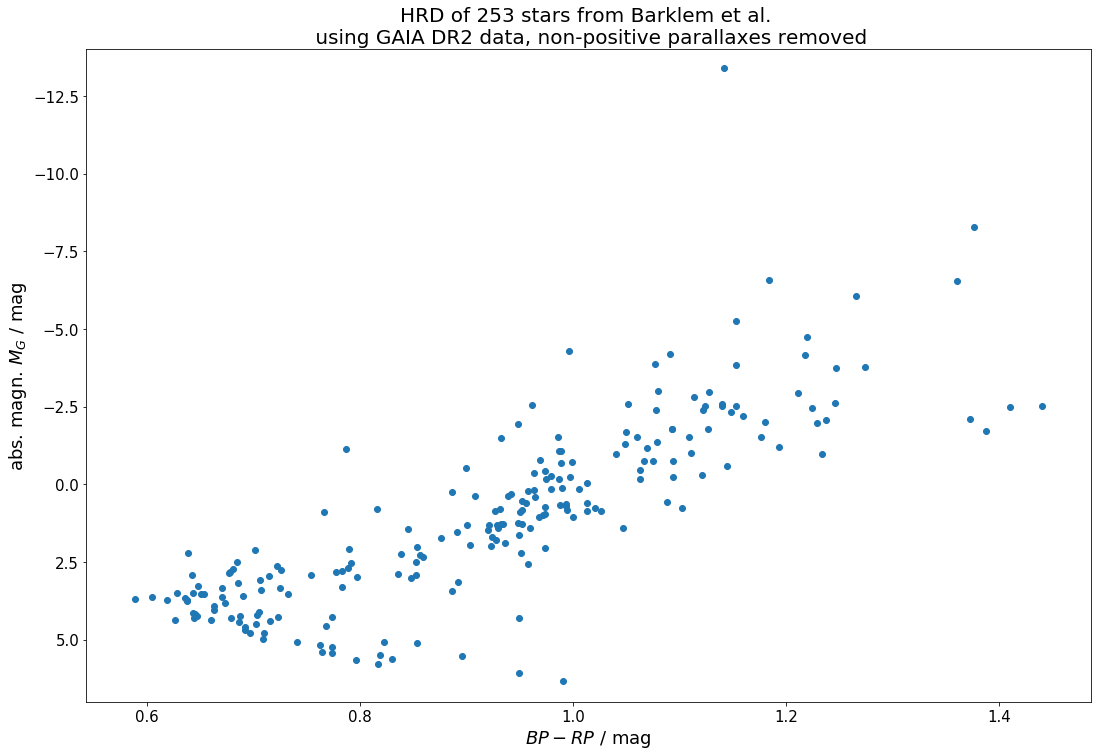

In [6]:
parallax = h[39]        # parallax in mas
G = h[80]               # G magnitude in mag
bp_rp = h[93]           # BP-RP in mag
E_B_V = h[7]
B_V0 = h[6] - h[7]
bp_rp_0 = 0.9604*B_V0 + 0.2473

# extinction in G band

c1=0.9761*np.ones(np.size(G))
c2=-0.1704*np.ones(np.size(G))
c3=0.0086*np.ones(np.size(G))
c4=0.0011*np.ones(np.size(G))
c5=-0.0438*np.ones(np.size(G))
c6=0.0013*np.ones(np.size(G))
c7=0.0099*np.ones(np.size(G))

A_0=3.1*E_B_V

k_G=c1+c2*bp_rp_0+c3*bp_rp_0**2+c4*bp_rp_0**3+c5*A_0+c6*A_0**2+c7*bp_rp_0*A_0

A_G=k_G*A_0

M_G = G + 5 + 5*np.log10(parallax/1000) - A_G # absolute magnitude in mag, derived using the distance modulus

plt.figure(figsize=(18,12))
plt.scatter(bp_rp,M_G)
plt.ylim(7,-14)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$BP-RP$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('HRD of 253 stars from Barklem et al. \n using GAIA DR2 data, non-positive parallaxes removed',size=20)
plt.savefig('Abbildungen/HRD_253stars_without_conditions.png')

In [7]:
h1 = np.transpose(h)

# find out how many parallaxes' relative precision is too unprecise

t=0
for line in h1:
    if np.abs(line[39]/line[40]) < 5:
        t=t+1
        
print('Number of parallaxes with relative precision larger than 20% (of remaining 243 objects):',t)
print('Number of objects left to plot:',int(np.size(np.transpose(h1)[0])-t))

# remove objects where parallax/parallax_error < 5 as above

b=np.array([])
for i in np.arange(int(np.size(np.transpose(h1)[0]))):
    if np.abs(h1[i][39]/h1[i][40]) <= 5:
        b=np.append(b,i)
        
b = b.astype(int)

h1 = np.transpose(np.delete(h1,b,0))

Number of parallaxes with relative precision larger than 20% (of remaining 243 objects): 114
Number of objects left to plot: 125


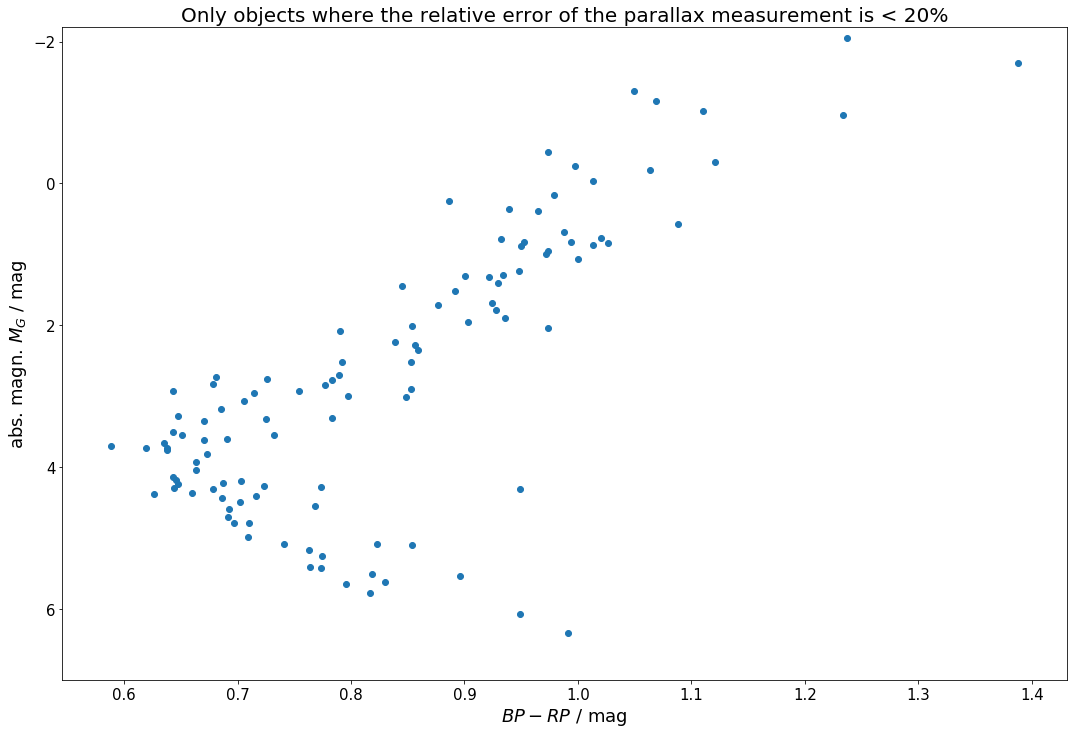

In [8]:
B_V10 = h1[6] - h1[7]
bp_rp10 = 0.9604*B_V10 + 0.2473

parallax1 = h1[39]        # parallax in mas
G1 = h1[80]               # G magnitude in mag
bp_rp1 = h1[93]           # BP-RP in mag
E_B_V1 = h1[7]

# extinction in G band

c1=0.9761*np.ones(np.size(G1))
c2=-0.1704*np.ones(np.size(G1))
c3=0.0086*np.ones(np.size(G1))
c4=0.0011*np.ones(np.size(G1))
c5=-0.0438*np.ones(np.size(G1))
c6=0.0013*np.ones(np.size(G1))
c7=0.0099*np.ones(np.size(G1))

A_01=3.1*E_B_V1

k_G1=c1+c2*bp_rp10+c3*bp_rp10**2+c4*bp_rp10**3+c5*A_01+c6*A_01**2+c7*bp_rp10*A_01

A_G1=k_G1*A_01

M_G2 = G1 + 5 + 5*np.log10(parallax1/1000) - A_G1  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000
e_bp_rp1 = bp_rp1 - bp_rp10
    
plt.figure(figsize=(18,12))
plt.scatter(bp_rp1,M_G2)
plt.ylim(7,-2.2)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$BP-RP$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('Only objects where the relative error of the parallax measurement is < 20%',size=20)
plt.savefig('Abbildungen/HRD_253stars_paral_prec.png')

125


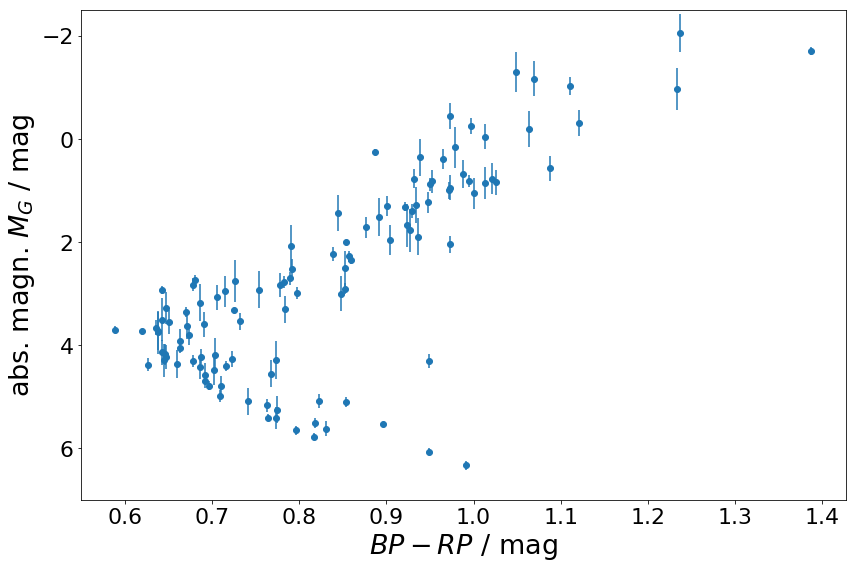

In [9]:
parallax1 = h1[39]        # parallax in mas
parallax1_e = h1[40]       # parallax error in mas
G1 = h1[80]               # G magnitude in mag
bp_rp1 = h1[93]           # BP-RP in mag
M_G2 = G1 + 5 + 5*np.log10(parallax1/1000) - A_G1  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000
    
dG1 = np.zeros(np.size(G1))
for i in range(np.size(G1)):
    if G1[i] < 13:
        dG1[i] = 0.3*10**(-3)
    if G1[i] < 17 and G1[i] > 13:
        dG1[i] = 2*10**(-3)
    if G1[i] > 17:
        dG1[i] = 10*10**(-3) 

dM_G2 = np.sqrt(dG1**2+(5*parallax1_e/(parallax1*np.log(10)))**2)

print(np.size(M_G2))

plt.figure(figsize=(12,8))
plt.errorbar(bp_rp1,M_G2,yerr=dM_G2,linestyle='None',marker='o')
plt.ylim(7,-2.5)
plt.yticks(size=22)
plt.xticks(size=22)
plt.xlabel('$BP-RP$ / mag',size=27)
plt.ylabel('abs. magn. $M_G$ / mag',size=27)
plt.tight_layout()
#plt.title('Only objects where the relative error of the parallax measurement is < 20%, with errorbars',size=20)
plt.savefig('Abbildungen/HRD_253stars_paral_prec_errorbars.png')

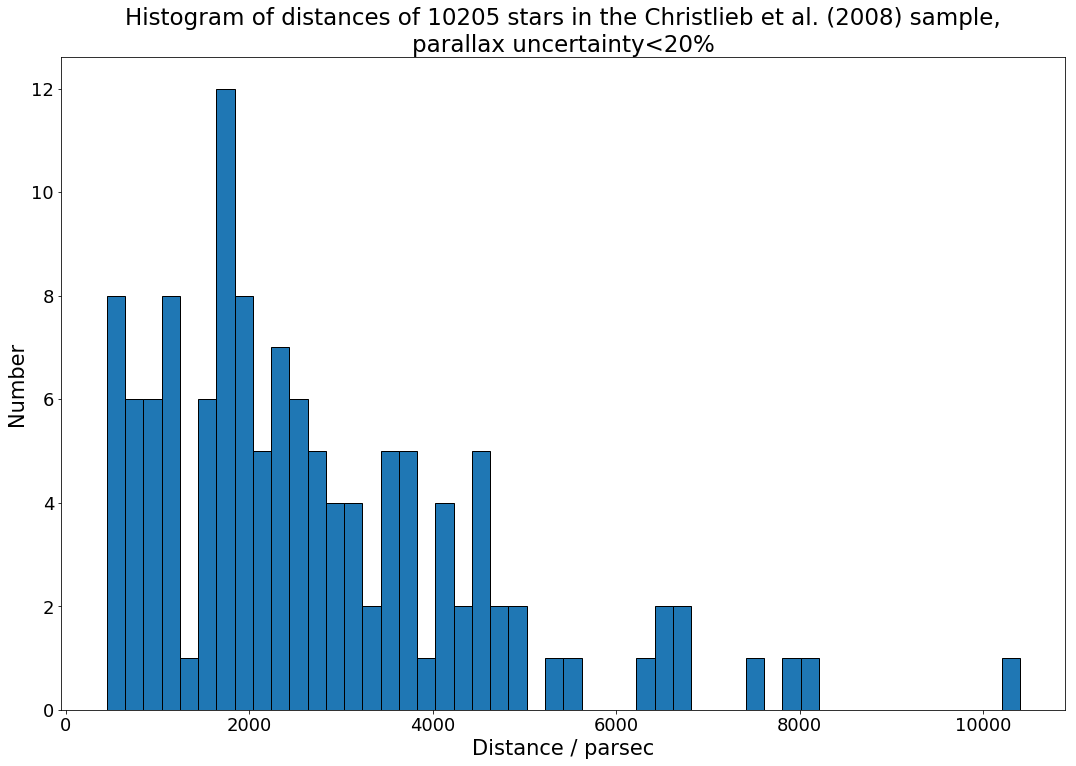

In [10]:
distance1 = 1000/parallax1

plt.figure(figsize=(18,12))
plt.hist(distance1,50,edgecolor='black')
plt.xlabel('Distance / parsec',size=21)
plt.ylabel('Number',size=21)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Histogram of distances of 10205 stars in the Christlieb et al. (2008) sample,\nparallax uncertainty<20%',size=23)
plt.savefig('Abbildungen/distances_3rdsample.png')

In [11]:
# to create a table with all that I've calculated; first find out indices 
# which will have NaN due to parallax condition: stored in a

g = np.genfromtxt('gaia_data_253_csv_ebv',skip_header=1,delimiter=',')

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][39] <= 0) or (np.isnan(g[int(i)][39]) == True) or (np.abs(g[i][39]/g[i][40]) <= 5):
        a=np.append(a,i)

# indices not in a
b=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][39] > 0) and (np.isnan(g[int(i)][39]) == False) and (np.abs(g[i][39]/g[i][40]) > 5):
        b=np.append(b,i)
        
a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

In [12]:
M_G3 = G1 + 5 + 5*np.log10(parallax1/1000)

abs_mag=np.zeros(249)

for i in a:
    abs_mag[i]=np.nan

for i in range(np.size(M_G3)):
    abs_mag[int(b[i])]=M_G3[i]

    
distanz=np.zeros(249)

for i in a:
    distanz[i]=np.nan

for i in range(np.size(M_G3)):
    distanz[int(b[i])]=distance1[i]
    
    
df = pd.read_csv(r'gaia_data_253_csv_ebv')

abs_magn = pd.DataFrame(data = abs_mag,columns=['M_G'])
distance = pd.DataFrame(data = distanz,columns=['distance'])

new = pd.concat([df['name'],df['source_id_cone'],df['ra_cone'],df['dec_cone'],df['parallax_cone'],df['parallax_error_cone'],df['phot_g_mean_mag_cone'],df['bp_rp_cone'],df['EBminV'],abs_magn,distance],axis=1)

new.rename(columns={'source_id_cone':'source_id','ra_cone':'ra','dec_cone':'dec','parallax_cone':'parallax','parallax_error_cone':'parallax_error','phot_g_mean_mag_cone':'Gmag','bp_rp_cone':'bp_rp'},inplace=True)

new.to_csv('transitional_table2.csv',index=False)

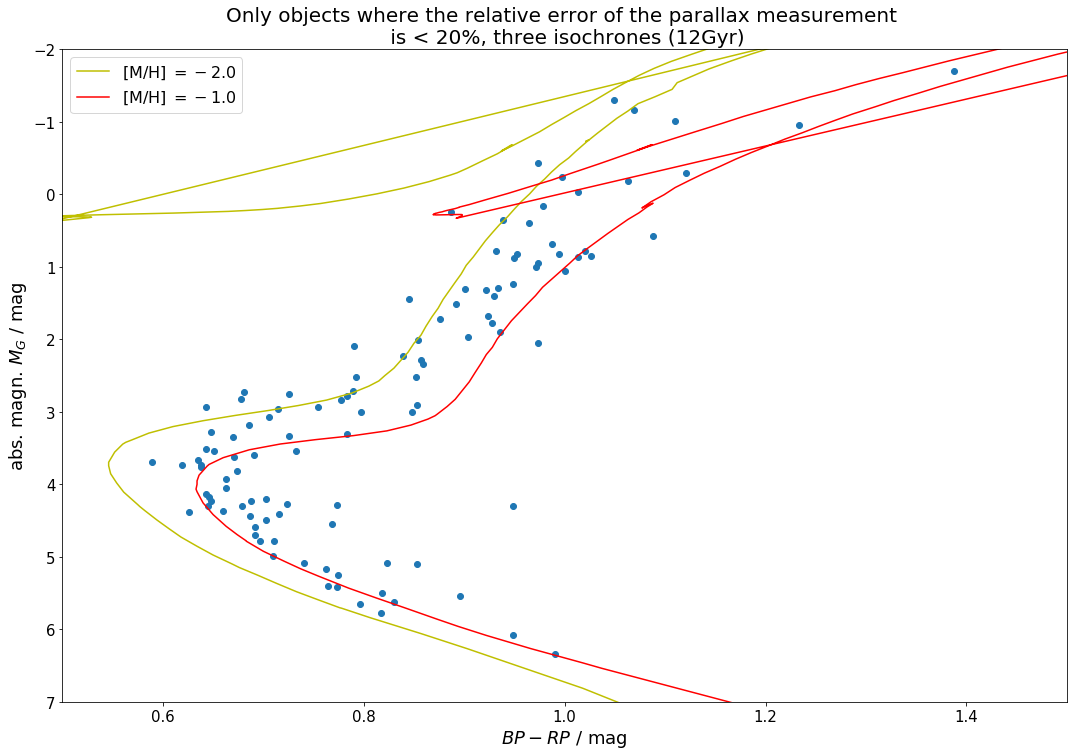

In [13]:
iso2 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__2_0.txt',skip_header=12,skip_footer=1))
iso7 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__1_0.txt',skip_header=12,skip_footer=1))

plt.figure(figsize=(18,12))
plt.plot(iso2[12]-iso2[13],iso2[11],label='[M/H] $= -2.0$',color='y')
plt.plot(iso7[12]-iso7[13],iso7[11],label='[M/H] $= -1.0$',color='r')
plt.scatter(bp_rp1,M_G2)
plt.ylim(7,-2)
plt.xlim(0.5,1.5)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$BP-RP$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('Only objects where the relative error of the parallax measurement \n is < 20%, three isochrones (12Gyr)',size=20)
plt.savefig('Abbildungen/HRD_253stars_paral_prec_iso.png')
plt.legend(fontsize=16)

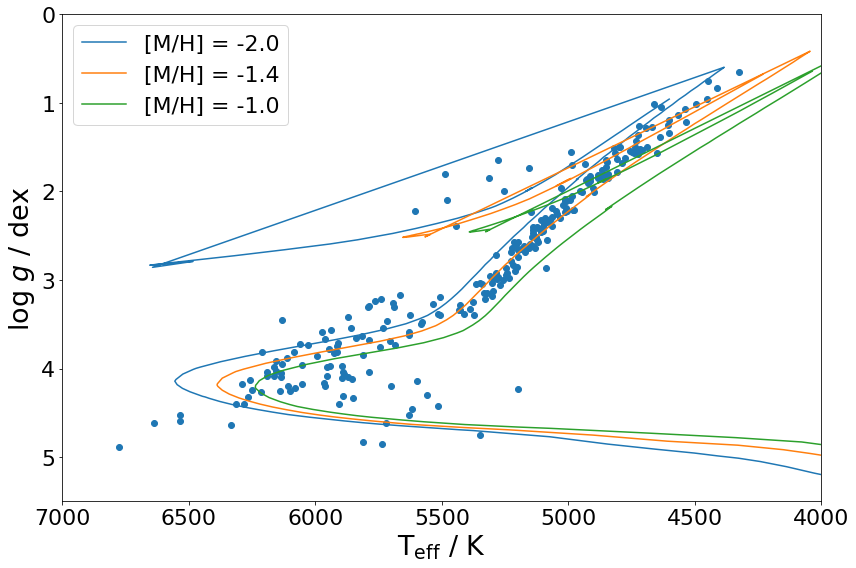

In [14]:
data=np.transpose(np.genfromtxt('253barklem_csv',delimiter=',',skip_header=1,usecols=(9,10,11,12,13)))

iso2 = np.transpose(np.genfromtxt('isochrones/isochrones253_12Gyr__2_0.txt',skip_header=12,skip_footer=12))
iso4 = np.transpose(np.genfromtxt('isochrones/isochrones253_12Gyr__1_4.txt',skip_header=12,skip_footer=12))
iso7 = np.transpose(np.genfromtxt('isochrones/isochrones253_12Gyr__1_0.txt',skip_header=12,skip_footer=12))

plt.figure(figsize=(12,8))
plt.plot(10**iso2[7],iso2[8],label='[M/H] = -2.0')
plt.plot(10**iso4[7],iso4[8],label='[M/H] = -1.4')
plt.plot(10**iso7[7],iso7[8],label='[M/H] = -1.0')
plt.scatter(data[0],data[2])
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlim(7000,4000)
plt.ylim(5.5,0)
plt.ylabel('$\log\ g$ / dex',size=27)
plt.xlabel('T$_{\mathrm{eff}}$ / K',size=27)
#plt.title('Surface gravity against effective Temperature with PARSEC isochrones',size=20)
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Abbildungen/HRD_logg_Teff_253stars.png')